<a href="https://colab.research.google.com/github/MaggieHDez/MathStatsAI/blob/main/loteAprendizajeAutomatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para el ejemplo 1: B* ≈ 135.72088082974528

Para el ejemplo 2: B* ≈ 1357.2088082974528

Para el ejemplo 3: B* ≈ 3684.031498640385

****************************************************************************



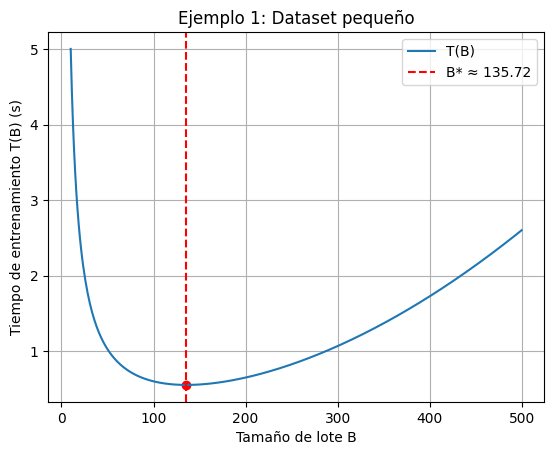


****************************************************************************



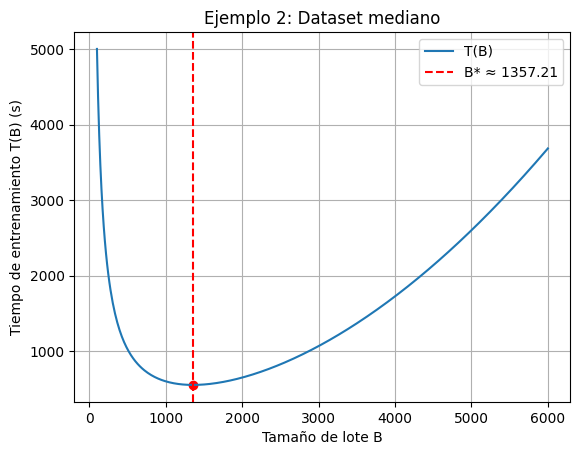


****************************************************************************



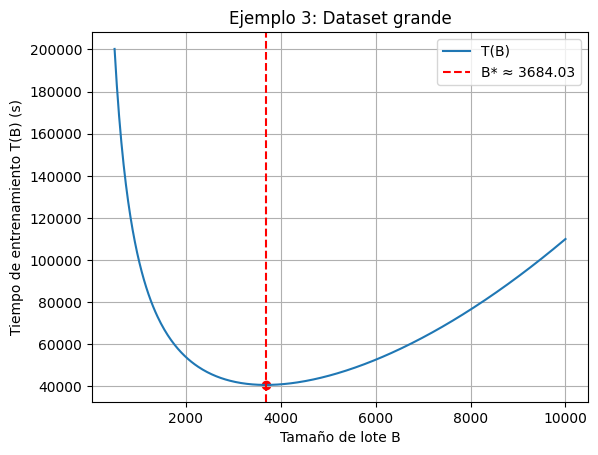


****************************************************************************



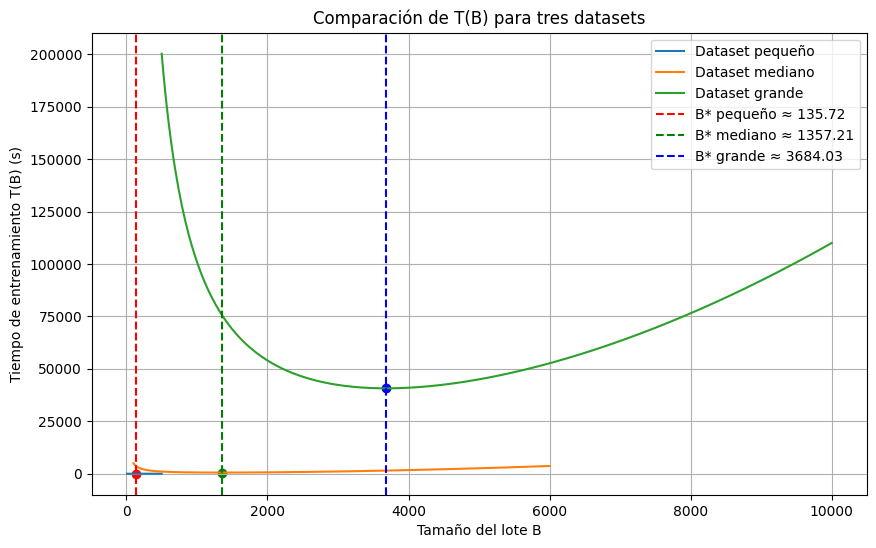

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Ejem 1: Dataset pequeño
n_total1 = 1e4 # 10,000 ejemplos
t0_1 = 0.005 # 5ms. Como el valor es entre 1ms y 10ms
c1 = 1e-5
min_B1, max_B1, num_puntos1 = 10, 500, 400 # Rango y cantidad de puntos

# Ejem 2: Dataset mediano
n_total2 = 1e6 # 1,000,000 ejemplos
t0_2 = 0.5 # 0.5s. Como el valor es entre 0.1s y 1s
c2 = 1e-4
min_B2, max_B2, num_puntos2 = 100, 6000, 400 # Rango y cantidad de puntos

# Ejem 3: Dataset grande
n_total3 = 1e8      # 100,000,000 ejemplos
t0_3 = 1.0          # 1 s. Valor entre 1s y 10s
c3 = 1e-3
min_B3, max_B3, num_puntos3 = 500, 10000, 400 # Rango y cantidad de puntos

# Función para B*
def calculoB (n, t , c):
  return (t * n / (2 * c))**(1/3)

#  Para calcular T y B
def calcular_T_B(N_total, t0, c, B_min, B_max, num_points):
  valores_B = np.linspace(B_min, B_max, num_points)
  valores_T = (N_total * t0) / valores_B + c * valores_B**2
  return valores_B, valores_T

# Función para graficar
def graficar(valores_b, funcion_T,valor_N, valor_c, valor_B, valor_t, ejemplo):
  plt.figure()
  plt.plot(valores_b, funcion_T, label='T(B)')
  plt.axvline(valor_B, color='r', linestyle='--', label=f'B* ≈ {valor_B:.2f}')
  plt.scatter(valor_B, (valor_N * valor_t)/valor_B + valor_c*valor_B**2, color='red') # el punto exacto de (B*, T(B*))
  plt.xlabel('Tamaño de lote B')
  plt.ylabel('Tiempo de entrenamiento T(B) (s)')
  plt.title(f'Ejemplo {ejemplo}')
  plt.legend()
  plt.grid(True)
  plt.show()

# Función para graficar los tres datasets en una misma figura
def graficar_tres(valores_B1, funcion_T1, b_asterisco1, n_total1, t0_1, c1,
                  valores_B2, funcion_T2, b_asterisco2, n_total2, t0_2, c2,
                  valores_B3, funcion_T3, b_asterisco3, n_total3, t0_3, c3):
    plt.figure(figsize=(10, 6))
    # Graficar las curvas de T(B) para cada uno
    plt.plot(valores_B1, funcion_T1, label='Dataset pequeño')
    plt.plot(valores_B2, funcion_T2, label='Dataset mediano')
    plt.plot(valores_B3, funcion_T3, label='Dataset grande')

    # Marcar los puntos óptimos (B*)
    plt.axvline(b_asterisco1, color='red', linestyle='--', label=f'B* pequeño ≈ {b_asterisco1:.2f}')
    plt.axvline(b_asterisco2, color='green', linestyle='--', label=f'B* mediano ≈ {b_asterisco2:.2f}')
    plt.axvline(b_asterisco3, color='blue', linestyle='--', label=f'B* grande ≈ {b_asterisco3:.2f}')

    plt.scatter(b_asterisco1, (n_total1 * t0_1) / b_asterisco1 + c1 * b_asterisco1**2, color='red')
    plt.scatter(b_asterisco2, (n_total2 * t0_2) / b_asterisco2 + c2 * b_asterisco2**2, color='green')
    plt.scatter(b_asterisco3, (n_total3 * t0_3) / b_asterisco3 + c3 * b_asterisco3**2, color='blue')

    plt.xlabel('Tamaño del lote B')
    plt.ylabel('Tiempo de entrenamiento T(B) (s)')
    plt.title('Comparación de T(B) para tres datasets')
    plt.legend()
    plt.grid(True)
    plt.show()

b_asterisco1 = calculoB(n_total1, t0_1, c1) # B*
b_asterisco2 = calculoB(n_total2, t0_2, c2) # B*
b_asterisco3 = calculoB(n_total3, t0_3, c3) # B*
print('Para el ejemplo 1: B* ≈',b_asterisco1)
print('\nPara el ejemplo 2: B* ≈',b_asterisco2)
print('\nPara el ejemplo 3: B* ≈',b_asterisco3)
print('\n****************************************************************************\n')
valores_B1,funcion_T1 = calcular_T_B(n_total1, t0_1, c1, min_B1, max_B1, num_puntos1)
valores_B2,funcion_T2 = calcular_T_B(n_total2, t0_2, c2, min_B2, max_B2, num_puntos2)
valores_B3,funcion_T3 = calcular_T_B(n_total3, t0_3, c3, min_B3, max_B3, num_puntos3)

graficar(valores_B1, funcion_T1, n_total1, c1, b_asterisco1, t0_1, '1: Dataset pequeño')
print('\n****************************************************************************\n')
graficar(valores_B2, funcion_T2, n_total2, c2, b_asterisco2, t0_2, '2: Dataset mediano')
print('\n****************************************************************************\n')
graficar(valores_B3, funcion_T3, n_total3, c3, b_asterisco3, t0_3, '3: Dataset grande')
print('\n****************************************************************************\n')
graficar_tres(valores_B1, funcion_T1, b_asterisco1, n_total1, t0_1, c1,
              valores_B2, funcion_T2, b_asterisco2, n_total2, t0_2, c2,
              valores_B3, funcion_T3, b_asterisco3, n_total3, t0_3, c3)
